# 📈 Linear Regression from Scratch – Explained

## 🔍 What is Linear Regression?

Linear regression is a supervised learning algorithm that learns a **straight-line relationship** between input $x$ and output $y$.

It aims to model predictions using:

$$
\hat{y} = w \cdot x + b
$$

Where:
- $x$ is the input feature
- $w$ is the weight (slope)
- $b$ is the bias (intercept)
- $\hat{y}$ is the predicted output

---

## 🎯 Goal of Linear Regression

We want to **find the best** $w$ and $b$ such that the predicted output $\hat{y}_i$ is as close as possible to the true output $y_i$ for every training example $i$.

The **error** for each point is:

$$
\text{error}_i = \hat{y}_i - y_i
$$

---

## 📉 Cost Function: Mean Squared Error (MSE)

To measure total error across all data, we use the **cost function**:

$$
C(w, b) = \frac{1}{2m} \sum_{i=1}^{m} \left( \hat{y}_i - y_i \right)^2
$$

Where:
- $m$ is the number of training examples
- $\hat{y}_i = w \cdot x_i + b$
- Squaring the error penalizes larger mistakes more
- Dividing by $2m$ makes derivative math cleaner

---

## 🧮 Gradient Descent (Minimizing Cost)

We use **Gradient Descent** to find $w$ and $b$ that minimize $C(w, b)$.

At each iteration:

$$
w = w - \alpha \cdot \frac{\partial C(w, b)}{\partial w}
$$

$$
b = b - \alpha \cdot \frac{\partial C(w, b)}{\partial b}
$$

Where:
- $\alpha$ is the **learning rate**
- $\frac{\partial C}{\partial w}$ and $\frac{\partial C}{\partial b}$ are the **gradients**

---

## 📘 Derivation of $\frac{\partial C(w, b)}{\partial w}$

We’ll now derive the partial derivative of the cost with respect to $w$ step by step.

Starting from:

$$
\frac{\partial C(w, b)}{\partial w} = \frac{\partial}{\partial w} \left( \frac{1}{2m} \sum_{i=1}^{m} \left( (w x_i + b) - y_i \right)^2 \right)
$$

Apply the chain rule:

$$
= \frac{1}{2m} \sum_{i=1}^{m} 2 \cdot \left( (w x_i + b) - y_i \right) \cdot \frac{\partial}{\partial w} \left( (w x_i + b) - y_i \right)
$$

Now simplify:

$$
= \frac{1}{2m} \sum_{i=1}^{m} 2 \cdot \left( (w x_i + b) - y_i \right) \cdot x_i
$$

Cancel out the 2:

$$
= \frac{1}{m} \sum_{i=1}^{m} x_i \cdot \left( (w x_i + b) - y_i \right)
$$

---

## 📘 Derivation of $\frac{\partial C(w, b)}{\partial b}$

Now for the derivative with respect to $b$:

$$
\frac{\partial C(w, b)}{\partial b} = \frac{\partial}{\partial b} \left( \frac{1}{2m} \sum_{i=1}^{m} \left( (w x_i + b) - y_i \right)^2 \right)
$$

Apply the chain rule again:

$$
= \frac{1}{2m} \sum_{i=1}^{m} 2 \cdot \left( (w x_i + b) - y_i \right) \cdot \frac{\partial}{\partial b} \left( (w x_i + b) - y_i \right)
$$

Simplify:

$$
= \frac{1}{2m} \sum_{i=1}^{m} 2 \cdot \left( (w x_i + b) - y_i \right) \cdot {1}
$$

Cancel the 2:

$$
= \frac{1}{m} \sum_{i=1}^{m} \left( (w x_i + b) - y_i \right)
$$

---

## 🔁 Final Update Rules (Gradient Descent)

Using the derivatives, the gradient descent updates become:

$$
w = w - \alpha \cdot \left[ \frac{1}{m} \sum_{i=1}^{m} x_i \cdot \left( (w x_i + b) - y_i \right) \right]
$$

$$
b = b - \alpha \cdot \left[ \frac{1}{m} \sum_{i=1}^{m} \left( (w x_i + b) - y_i \right) \right]
$$

---

## ✅ Why Use Linear Regression?

- Simple and interpretable
- Fast and efficient
- Good baseline for regression tasks
- Forms foundation for more advanced models

---

## ⚠️ Limitations of Linear Regression

- 📉 **Assumes linearity**  
  It can't model curves or complex patterns.

- ❗ **Sensitive to outliers**  
  A few extreme points can skew the line significantly.

- 🔁 **Multicollinearity problems**  
  When features are highly correlated, the model becomes unstable.

- ⚖️ **Assumes constant variance** (homoscedasticity)  
  Linear regression assumes that the spread of residuals is the same for all inputs.

- 🚫 **Not for classification**  
  Linear regression is not suitable for binary or categorical output.

---

Learned equation:  salary = 9449.96 * years_experience + 25792.20
R² score (goodness-of-fit): 0.9570


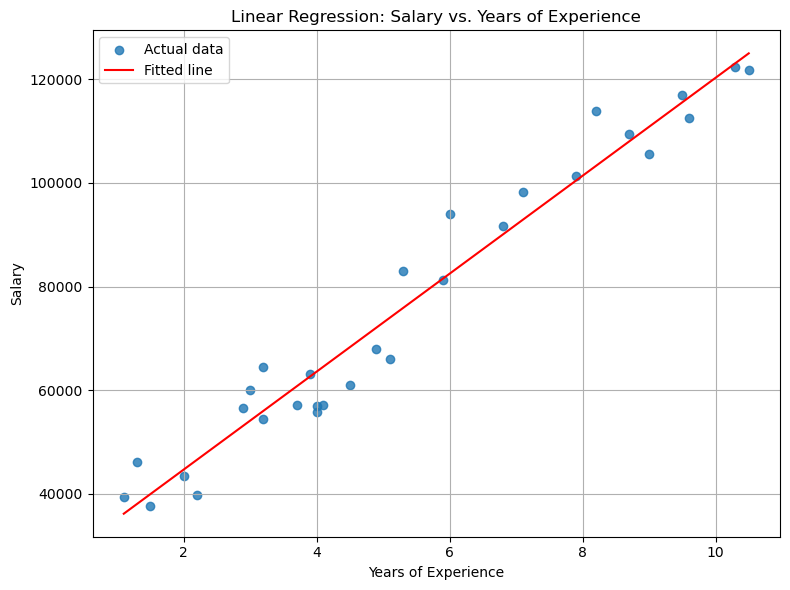

In [1]:
# linear_regression_salary.py
# --------------------------------
# Predict Salary from Years of Experience
# using Ordinary Least Squares (OLS) linear regression
# --------------------------------
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# 1) -------- Prepare the data --------
# Get the current directory where the notebook is running
base_dir = os.getcwd()

# Construct the path to the CSV file inside the 'data' folder
data_path = os.path.join(base_dir, 'data', 'raw', 'datalinear.csv')

# Read the CSV
data_actual = pd.read_csv(data_path)

df_actual = pd.DataFrame(data_actual)

X_actual = df_actual[['YearsExperience']].values  # 2-D array
y_actual = df_actual['Salary'].values             # 1-D target array

# 2) -------- Train the model --------
model_actual = LinearRegression()
model_actual.fit(X_actual, y_actual)

w_actual = model_actual.coef_[0]     # slope
b_actual = model_actual.intercept_   # intercept

# 3) -------- Make predictions --------
y_pred_actual = model_actual.predict(X_actual)
r2_actual = r2_score(y_actual, y_pred_actual)

print(f"Learned equation:  salary = {w_actual:.2f} * years_experience + {b_actual:.2f}")
print(f"R² score (goodness-of-fit): {r2_actual:.4f}")

# 4) -------- Visualise --------
plt.figure(figsize=(8, 6))
plt.scatter(X_actual, y_actual, color="tab:blue", label="Actual data", alpha=0.8)

x_line_actual = np.linspace(X_actual.min(), X_actual.max(), 100).reshape(-1, 1)
y_line_actual = model_actual.predict(x_line_actual)
plt.plot(x_line_actual, y_line_actual, color="red", label="Fitted line")

plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Linear Regression: Salary vs. Years of Experience")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [10]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
# Get the current directory where the notebook is running
base_dir = os.getcwd()

# Construct the path to the CSV file inside the 'data' folder
data_path = os.path.join(base_dir, 'data', 'raw', 'datalinear.csv')

# Read the CSV
training_data = pd.read_csv(data_path)

# Preview the data
print(training_data.head())








   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0


In [3]:
x_train = training_data["YearsExperience"].values
y_train = training_data["Salary"].values


Text(0, 0.5, 'Salary')

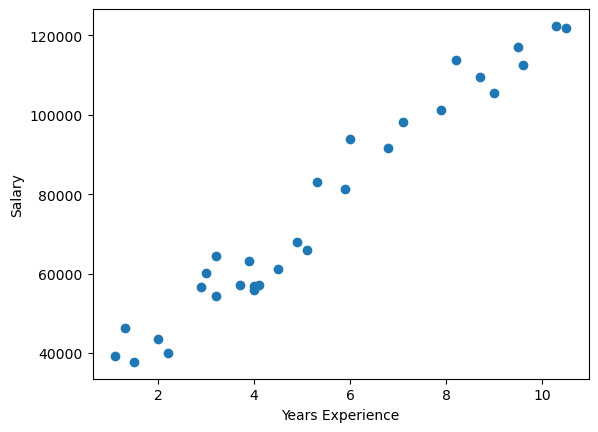

In [4]:
plt.scatter(x_train,y_train)
plt.xlabel("Years Experience")
plt.ylabel("Salary")

In [5]:
def cost_function(x, y, w, b):  
    # This defines a function named 'cost_function' that takes:
    # x = input features (list or array, year of experience)
    # y = actual target values (list or array, real salary)
    # w = weight (slope of the line)
    # b = bias (intercept)
    
    m = len(x)  
    # m is the number of training examples (i.e., how many x-values you have)

    cost_sum = 0  
    # Initialize the total cost to 0 — we will add up all the individual errors here

    for i in range(m):  
        # Loop through each training example (from 0 to m-1)

        f = w * x[i] + b  
        # Predict the output using the linear equation: ŷ = w * x + b

        cost = (f - y[i]) ** 2  
        # Calculate the squared error: (prediction - actual)^2

        cost_sum += cost  
        # Add this error to the running total

    total_cost = (1/(2*m)) * cost_sum  
    # Calculate the final cost by dividing total error by 2m
    # (the '2' is for convenience in calculus when computing gradients later)

    return total_cost  
    # Return the final average cost (how far off all predictions are on average)


In [6]:
def gradient_function(x, y, w, b):
    # Define a function to calculate the slope (gradient) of the cost function
    # x = input values (like years of experience)
    # y = actual target values (like real salary)
    # w = current weight (slope)
    # b = current bias (intercept)

    m = len(x)
    # m = number of data points

    dc_dw = 0
    dc_db = 0
    # Start with zero slope for both w and b — we will accumulate the total gradients here

    for i in range(m):
        f = w * x[i] + b
        # f = the prediction we make using the current w and b

        dc_dw += (f - y[i]) * x[i]
        # Add to the gradient for w: how wrong we were (f - y[i]) times how big x[i] was
        # This tells us how much the weight (slope) is affecting the error

        dc_db += (f - y[i])
        # Add to the gradient for b: how wrong we were
        # Bias affects the prediction equally for every x, so we just add the error

    dc_dw = (1/m) * dc_dw
    dc_db = (1/m) * dc_db
    # Take the average of the gradients over all data points

    return dc_dw, dc_db
    # Give back the two gradients: how much to change w and b to reduce error

In [7]:
def gradient_descent(x, y, alpha, iterations):
    # Define a function to "teach" the model to find the best w and b
    # x = input values (like years of experience)
    # y = actual target values (like real salaries)
    # alpha = learning rate (how big a step we take each time)
    # iterations = how many times we want to train (repeat the process)

    w = 0
    b = 0
    # Start with a guess: w = 0 (no slope), b = 0 (starts from zero line)

    for i in range(iterations):
        # Repeat this process many times to slowly improve w and b

        dc_dw, dc_db = gradient_function(x, y, w, b)
        # Ask: "How should we change w and b to make predictions better?"
        # This returns the slope (gradient) of the cost for both w and b

        w = w - alpha * dc_dw
        # Update w: take a small step (size alpha) in the direction that makes cost go down

        b = b - alpha * dc_db
        # Update b the same way — small step in direction that lowers the error

        # print(f"Iteration {i}: Cost {cost_function(x, y, w, b)}")
        # (Optional) Show how the error is changing at each step — useful for tracking progress

    return w, b
    # After all the training steps, return the final best values of w and b

In [9]:
learning_rate = 0.01
# This is alpha (α) — how big each learning step should be
# Small value = small steps (slow but safe)
# Big value = big steps (fast but might overshoot and go crazy!)

iterations = 10000
# This is how many times we repeat the training loop
# More = better learning (up to a point), but also takes longer

final_w, final_b = gradient_descent(x_train, y_train, learning_rate, iterations)
# This calls our learning function!
# We pass in:
# - x_train: the input data (like years of experience)
# - y_train: the actual answers (like salaries)
# - learning_rate: how fast to learn
# - iterations: how long to train
# The function will return the final best guesses for:
# - final_w: the best slope (how much y changes when x changes)
# - final_b: the best bias (starting value when x = 0)

print(f"w: {final_w:.4f}, b: {final_b:.4f}")
# This shows your final results after training!
# .4f = format the number to show 4 decimal places
# Example output: w: 2.0067, b: 1.1134
# So now you can use this line: y = w * x + b to make predictions

w: 9449.9623, b: 25792.2002


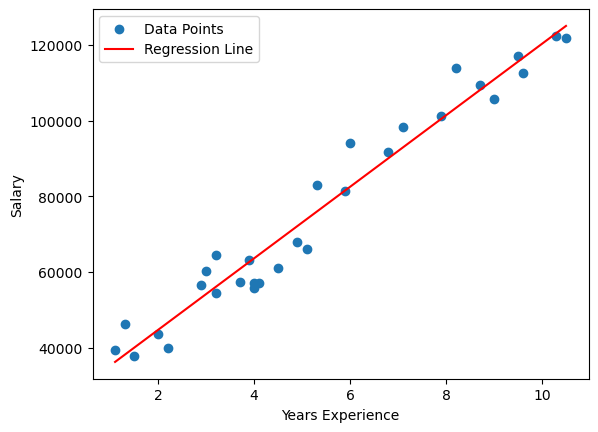

In [26]:
plt.scatter(x_train, y_train, label='Data Points')
# Plot all the training data points as dots on the graph
# x_train = years of experience
# y_train = actual salaries
# These are the real-world observations we gave the model

x_vals = np.linspace(min(x_train), max(x_train), 100)
# Create 100 evenly spaced x-values from the smallest to the biggest x_train
# We use this to draw a smooth line — not just a line between two dots

y_vals = final_w * x_vals + final_b
# Use our final learned model (y = wx + b) to predict y values for each x in x_vals
# These y_vals form the predicted straight regression line

plt.plot(x_vals, y_vals, color='red', label='Regression Line')
# Draw the red line that shows the model’s prediction for salary at each experience level
# This is your final trained model’s result!

plt.xlabel("Years Experience")
plt.ylabel("Salary")
plt.legend()
plt.show()

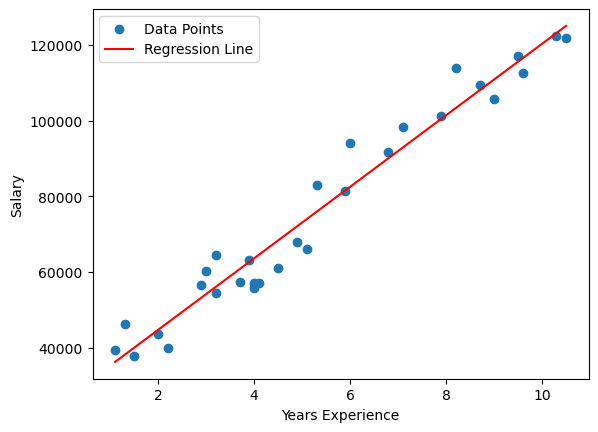

In [10]:
plt.scatter(x_train, y_train, label='Data Points')

# Use your actual training x values to compute predicted y values
y_preds = final_w * x_train + final_b
plt.plot(x_train, y_preds, color='red', label='Regression Line')

plt.xlabel("Years Experience")
plt.ylabel("Salary")
plt.legend()
plt.show()